extract sun position data for 2 places 

In [16]:
!pip install pvlib pytz

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 6.8 MB/s eta 0:00:00a 0:00:01


/tmp/ipykernel_1477/948345640.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = latitude


FileNotFoundError: [Errno 2] No such file or directory: '/data/location_1_sun_position.png'

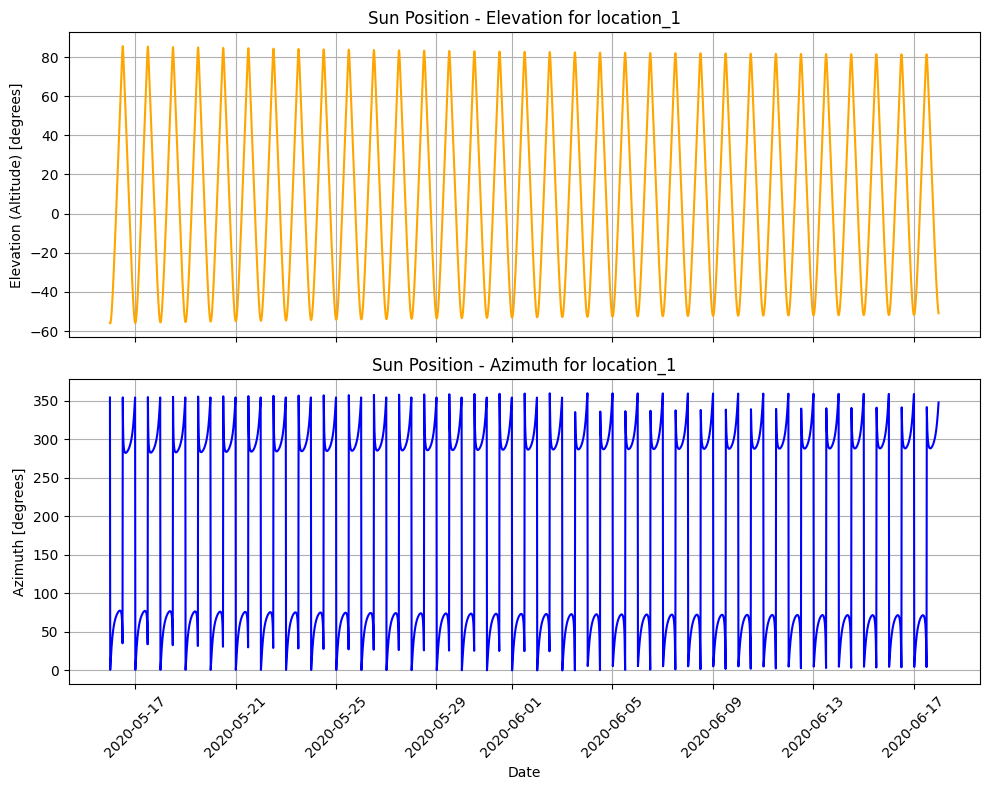

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pvlib import solarposition
import pytz

# Koordinaten der beiden Standorte
locations = [
    {"latitude": 14.81334707079426, "longitude": 78.28666058707, "name": "location_1"},  # Erster Standort
    {"latitude": 19.996751368420384, "longitude": 73.79008784475225, "name": "location_2"}  # Zweiter Standort
]

# Zeitbereich: Vom 15. Mai 2020 bis zum 17. Juni 2020
start_date = datetime(2020, 5, 15, 18, 30, 0)  # Startzeit: 18:30 IST
end_date = datetime(2020, 6, 17, 18, 15, 0)   # Endzeit: 18:15 IST
time_interval = timedelta(minutes=15)

# Zeitzone für Indien (IST - Indian Standard Time)
india_timezone = pytz.timezone('Asia/Kolkata')

# Funktion, um Sonnenposition zu berechnen
def get_sun_position(latitude, longitude, start_date, end_date, interval):
    # Generiere einen Zeitbereich mit UTC-Zeitstempeln
    time_range_utc = pd.date_range(start=start_date, end=end_date, freq=interval, tz='UTC')
    
    # Berechne die Sonnenpositionen im UTC-Zeitbereich
    solar_pos = solarposition.get_solarposition(time_range_utc, latitude, longitude)
    
    # Wandle den Zeitbereich von UTC nach IST (Indian Standard Time)
    solar_pos.index = solar_pos.index.tz_convert(india_timezone)
    
    return solar_pos

# Funktion, um Sonnenstand darzustellen
def plot_sun_position(df, location_name):
    # Erstelle einen Plot für den Sonnenstand
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Altitude (Elevation) plot
    ax[0].plot(df['timestamp'], df['elevation'], label='Elevation (Altitude)', color='orange')
    ax[0].set_ylabel('Elevation (Altitude) [degrees]')
    ax[0].set_title(f'Sun Position - Elevation for {location_name}')
    ax[0].grid(True)
    
    # Azimuth plot
    ax[1].plot(df['timestamp'], df['azimuth'], label='Azimuth', color='blue')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Azimuth [degrees]')
    ax[1].set_title(f'Sun Position - Azimuth for {location_name}')
    ax[1].grid(True)

    # Date format on x-axis
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Speichern des Plots als PNG-Datei
    plt.savefig(f'{location_name}_sun_position.png')
    plt.show()

# Daten für jeden Standort sammeln und darstellen
for location in locations:
    latitude = location["latitude"]
    longitude = location["longitude"]
    location_name = location["name"]
    
    # Sonnenposition berechnen
    solar_pos = get_sun_position(latitude, longitude, start_date, end_date, time_interval)
    
    # Daten in einem pandas DataFrame speichern
    df = solar_pos[['apparent_elevation', 'azimuth', 'elevation', 'zenith']]
    df['latitude'] = latitude
    df['longitude'] = longitude
    df['timestamp'] = df.index
    
    # Plot für den Sonnenstand darstellen
    plot_sun_position(df, location_name)

    print(f"Sonnenpositionsgrafik für {location_name} wurde erfolgreich gespeichert.")
